During this tutorial, you are going to have deeper understanding of terms of expected value, standard deviation, and covariance & correlation matrix

It is advised to work on NumPy objects instead of Pandas DataFrames.

Import all necessary modules - NumPy, Pandas, MatPlotLib.PyPlot, SeaBorn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In probability theory, the expected value (also called expectation, expectancy, mathematical expectation, mean, average, or first moment) is a generalization of the weighted average. Informally, the expected value is the arithmetic mean of a large number of independently selected outcomes of a random variable. (Source: Wikipedia). 

The uploaded picture shows the formula for expected value. Your task will be to apply the formula for weather history dataset

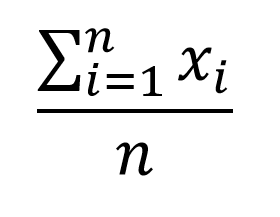

Read weatherHistory.csv and get mean values of each column. Don't use mean function and get numpy version of the dataset. Try to achieve the following results with sum function.

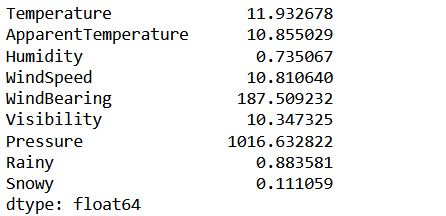

In [2]:
df = pd.read_csv('../data/weatherHistory.csv')
data = df.values

In [3]:
df.shape

(96453, 9)

In [4]:
mean = data.sum(axis = 0) / data.shape[0]
mean

array([1.19326784e+01, 1.08550289e+01, 7.35066590e-01, 1.08106401e+01,
       1.87509232e+02, 1.03473249e+01, 1.01663282e+03, 8.83580604e-01,
       1.11059272e-01])

In [5]:
df.mean()

Temperature              11.932678
ApparentTemperature      10.855029
Humidity                  0.735067
WindSpeed                10.810640
WindBearing             187.509232
Visibility               10.347325
Pressure               1016.632822
Rainy                     0.883581
Snowy                     0.111059
dtype: float64

Expected value is also used in computation of variance by using the below formula. Try to obtain variances for each column and compare your results with the output of the function of var() 

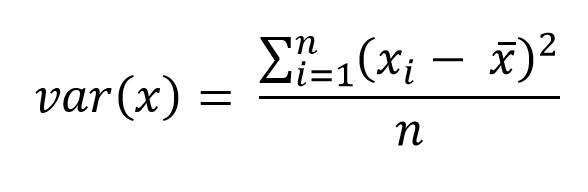

In [6]:
square_differences = (data - data.mean(axis = 0)) ** 2
sum_of_square_differences = square_differences.sum(axis = 0)
var = sum_of_square_differences / data.shape[0]
var.shape

(9,)

In [7]:
var

array([9.12310912e+01, 1.14421358e+02, 3.80859812e-02, 4.77969686e+01,
       1.15310811e+04, 1.75737147e+01, 6.21233538e+01, 1.02865920e-01,
       9.87251104e-02])

In [8]:
df.var() 

Temperature               91.232037
ApparentTemperature      114.422544
Humidity                   0.038086
WindSpeed                 47.797464
WindBearing            11531.200691
Visibility                17.573897
Pressure                  62.123998
Rainy                      0.102867
Snowy                      0.098726
dtype: float64

In [9]:
data.var(axis = 0)

array([9.12310912e+01, 1.14421358e+02, 3.80859812e-02, 4.77969686e+01,
       1.15310811e+04, 1.75737147e+01, 6.21233538e+01, 1.02865920e-01,
       9.87251104e-02])

Obtain standard deviation of the previous results and compare with the output of the function of std()

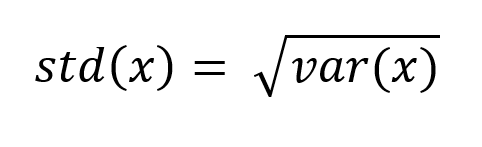

In [10]:
std = np.sqrt(var)
std

array([  9.55149681,  10.69679194,   0.1951563 ,   6.91353517,
       107.38287172,   4.19210146,   7.88183696,   0.32072717,
         0.31420552])

In [11]:
df.std()

Temperature              9.551546
ApparentTemperature     10.696847
Humidity                 0.195157
WindSpeed                6.913571
WindBearing            107.383428
Visibility               4.192123
Pressure                 7.881878
Rainy                    0.320729
Snowy                    0.314207
dtype: float64

In [12]:
data.std(axis = 0)

array([  9.55149681,  10.69679194,   0.1951563 ,   6.91353517,
       107.38287172,   4.19210146,   7.88183696,   0.32072717,
         0.31420552])

var() and std() functions have slightly different results if you use pandas. To understand why, your keyword: sample and population data

This is because of difference in formulas. In Pandas, there is n-1 in denominator while it is n for NumPy. As explained during tutorial, data can be called population or sample data. Population data indicates the whole dataset, however, sample data is just a part of population dataset. For example, dataset of Azerbaijanian people is labeled as 'population', but dataset of those who live in one city of Azerbaijan, say Baku is just a sample of the original dataset. In population data, standard deviation is calculated with the formula we used previously. When you want to take a sample from this dataset, standard deviation will be higher and it is better to have right version of the formula, for instance, n - 1 in denominator 

Plot histogram of Temperature and Humidity

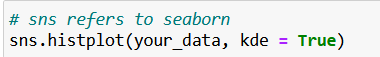

The main aim behind plotting these graphs is just to understand how data distribute with different standard deviations. Just take a look at x axis in each plot and their corresponding standard deviations. Try to understand how different they are. 

<AxesSubplot: xlabel='Temperature', ylabel='Count'>

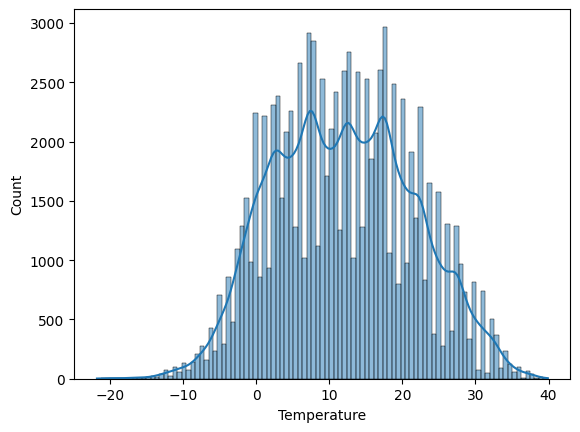

In [13]:
sns.histplot(df.Temperature, kde = True)

<AxesSubplot: xlabel='Humidity', ylabel='Count'>

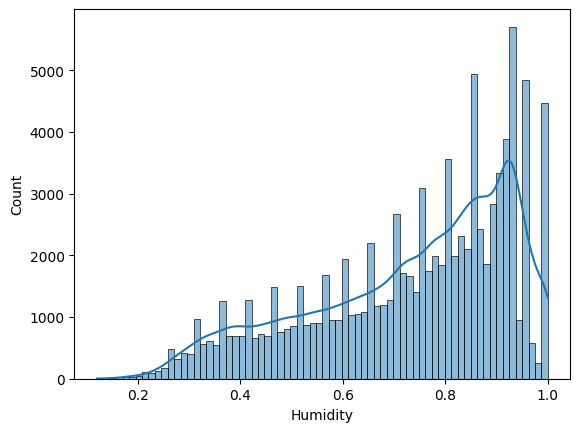

In [14]:
sns.histplot(df.Humidity, kde = True)

Standard deviation is one of fundamental components that are used in computation of correlation matrix. In this task, you will obtain both correlations and covariances of Temperature column with all columns

For simplification of the task, firstly obtain the covariance value between Temperature and ApparentTemperature based on the below formula

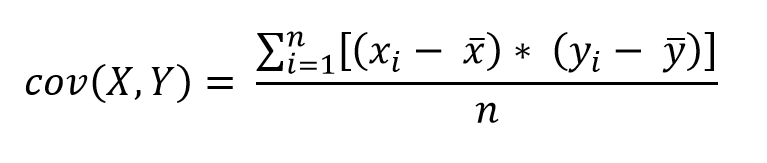

In [15]:
## We don't use axis for now since we just focus on two individual columns

X = df['ApparentTemperature'].values
Y = df['Temperature'].values

cov = ((X - X.mean()) * (Y - Y.mean())).sum() / Y.size
cov

101.4172317096979

Now, obtain the correlation value by following the below formula

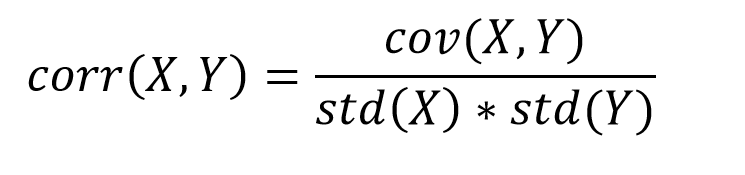

In [16]:
corr = cov / X.std() / Y.std()
corr

0.9926285641921313

For harder challenge, let's consider to obtain covariance values between temperature column and all columns. It is better to have 2D array of temperature column like (96453, 1).

Tips: use axis = 0 for the matrix containing all columns in order to make the computation desired

In [17]:
X = df.values
Y = df[['Temperature']].values # double square brackets make the resulting array 2D

## We use axis = 0 because we have 2D array instead of 1D. 
## We will explain axis terms in more details during the online session. Stay tuned!
covs = ((X - X.mean(axis = 0)) * (Y - Y.mean())).sum(axis = 0) / Y.size
covs

array([ 91.23109125, 101.41723171,  -1.18472282,   0.5914699 ,
        30.7579164 ,  15.72990818, -22.52210327,   1.69674944,
        -1.68849666])

Now, proceed your code with determination of correlations. Use axis = 0 again

In [18]:
corrs = covs / X.std(axis = 0) / Y.std()
corrs

array([ 1.        ,  0.99262856, -0.63556906,  0.00895697,  0.0299882 ,
        0.39284657, -0.2991645 ,  0.55387342, -0.56261973])

Compare your results with outputs of cov and corr functions for only Temperature column

In [19]:
df.cov()['Temperature']

Temperature             91.232037
ApparentTemperature    101.418283
Humidity                -1.184735
WindSpeed                0.591476
WindBearing             30.758235
Visibility              15.730071
Pressure               -22.522337
Rainy                    1.696767
Snowy                   -1.688514
Name: Temperature, dtype: float64

In [20]:
df.corr()['Temperature']

Temperature            1.000000
ApparentTemperature    0.992629
Humidity              -0.635569
WindSpeed              0.008957
WindBearing            0.029988
Visibility             0.392847
Pressure              -0.299165
Rainy                  0.553873
Snowy                 -0.562620
Name: Temperature, dtype: float64

In [21]:
df.cov()['Temperature'] - covs

Temperature            0.000946
ApparentTemperature    0.001051
Humidity              -0.000012
WindSpeed              0.000006
WindBearing            0.000319
Visibility             0.000163
Pressure              -0.000234
Rainy                  0.000018
Snowy                 -0.000018
Name: Temperature, dtype: float64

In [22]:
df.corr()['Temperature'] - corrs

Temperature            2.220446e-16
ApparentTemperature    1.487699e-14
Humidity              -3.219647e-15
WindSpeed             -2.480655e-16
WindBearing           -2.775558e-17
Visibility             7.827072e-15
Pressure               1.448841e-14
Rainy                 -5.773160e-15
Snowy                 -5.773160e-15
Name: Temperature, dtype: float64

We see that ApparentTemperature is highly related to Temperature while Humidity has inverse proportional relationship. To have a better understanding, let's make a scatter plot for relationship of Temperature with ApparentTemperature and with Humidity

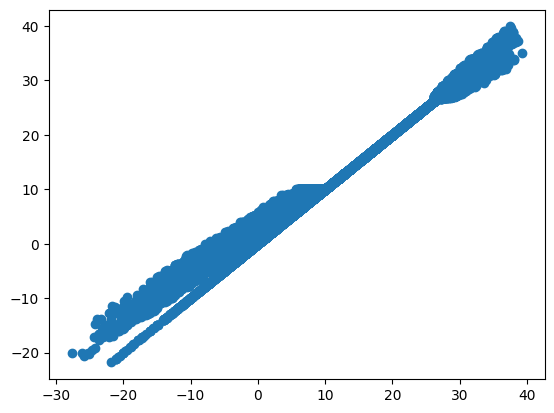

In [23]:
plt.scatter(df['ApparentTemperature'], df['Temperature'])

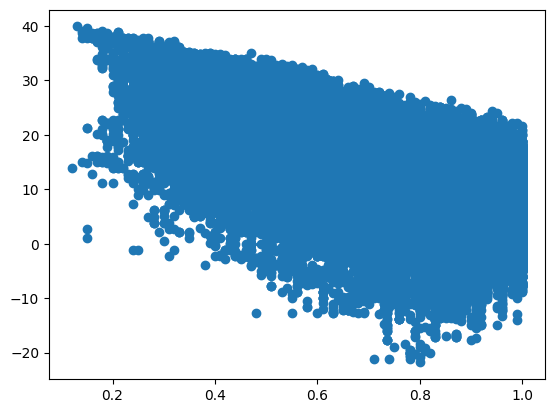

In [24]:
plt.scatter(df['Humidity'], df['Temperature'])